In [4]:
!pip install --upgrade mlxtend scikit-learn matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


#Bagging

In [1]:
%matplotlib inline 

import itertools
import numpy as np #para manipular numeros e efetuar operacoes matematicas

import seaborn as sns #para visualizacoes mais sofisticadas 
import matplotlib.pyplot as plt #para criar visualizacoes
import matplotlib.gridspec as gridspec #para criar uma "grade" atras do grafico

from sklearn import datasets #para importar datasets

from sklearn.tree import DecisionTreeClassifier #para usar o modelo de Arvore de decisao
from sklearn.neighbors import KNeighborsClassifier #para usar o molode KNN
from sklearn.linear_model import LogisticRegression #para usar o modelo Regressao Logistica
from sklearn.ensemble import RandomForestClassifier #para usar o modelo de Florestas Aleatorias

from sklearn.ensemble import BaggingClassifier #
from sklearn.model_selection import cross_val_score, train_test_split #importando a score para validacao cruzada, e o metodo para separar dados em treino e teste

from mlxtend.plotting import plot_learning_curves #metodo para plotar a curva de aprendizado 
from mlxtend.plotting import plot_decision_regions #metodo para plotar as regioes de decisao

np.random.seed(123) #definindo uma seed

In [2]:
iris = datasets.load_iris() #recebendo o dataset Iris
X, y = iris.data[:, 0:2], iris.target #separando os dados em x e y
    
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1) #instanciando o modelo de arvore de decisao, passando dois parametros, "criterion" e "max_depth", 
#que seria a profundidade da arvore 
clf2 = KNeighborsClassifier(n_neighbors=1) #instanciando o modelo KNN, passando apenas um vizinho como parametro

bagging1 = BaggingClassifier(estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8) #Modelo bagging usando a arvore de decisao para testar a estabilidade
bagging2 = BaggingClassifier(estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8) #Modelo bagging usando knn, tambem para testar a estabilidade do modelo

Accuracy: 0.63 (+/- 0.02) [Decision Tree]
Accuracy: 0.71 (+/- 0.03) [K-NN]
Accuracy: 0.67 (+/- 0.05) [Bagging Tree]
Accuracy: 0.69 (+/- 0.06) [Bagging K-NN]


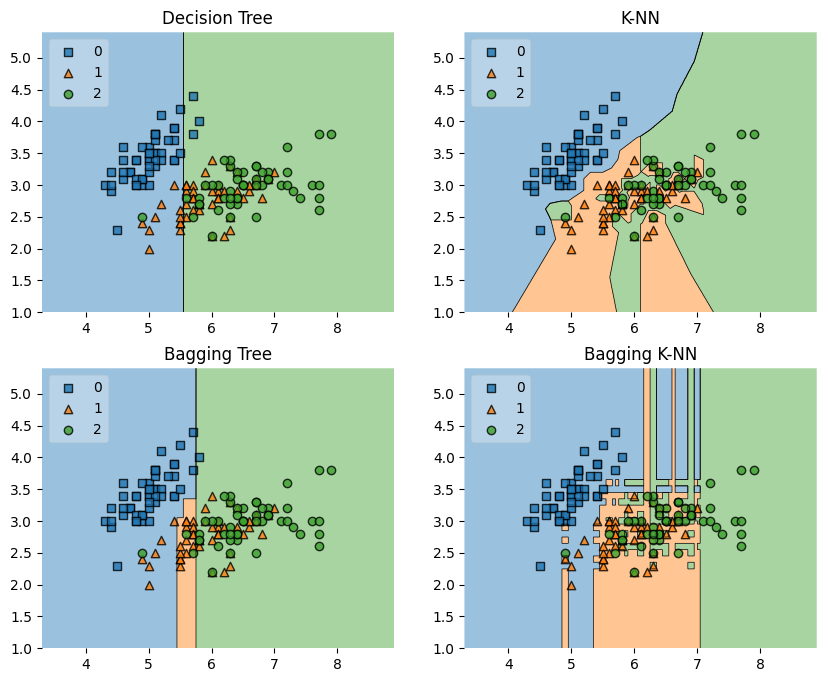

In [3]:
#criando um plot para mostrar os pontos de cada classe, e as regioes de decisao. Cada regiao de uma cor, mas pode ser ruim tambem, caso o seja um problema multidimensional

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

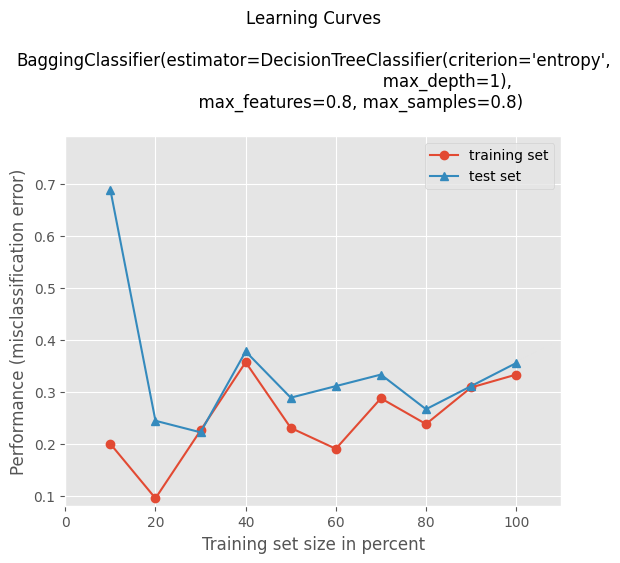

In [7]:
#plotando as curvas de aprendizado para o modelo bagging1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=True, style='ggplot')
plt.show()

#podemos ver que para esse caso, a perfomace do treino e do teste nao mudaram muito.

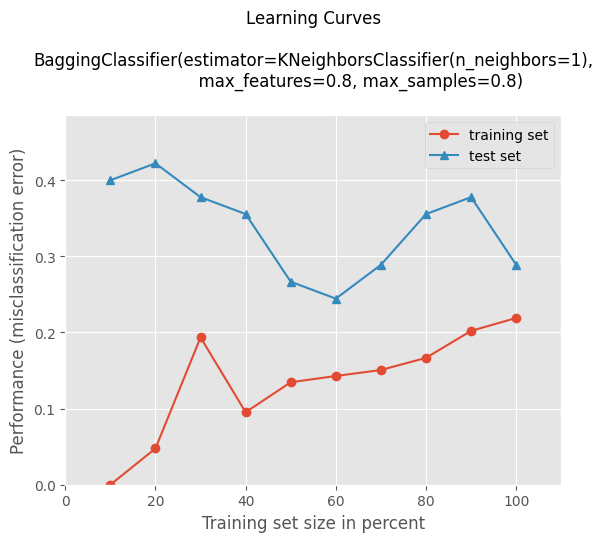

In [23]:
#plotando as curvas de aprendizado para o modelo bagging2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging2, print_model=True, style='ggplot')
plt.show()

#ja nesse caso, as curvas sao bem diferentes uma da outra.

In [24]:
#Ensemble Size
num_est = list(map(int, np.linspace(1,100,20)))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy') #efetuando a validacao cruzada, passando o parametro cv = 3, para que o dataset seja separado em 3 partes
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

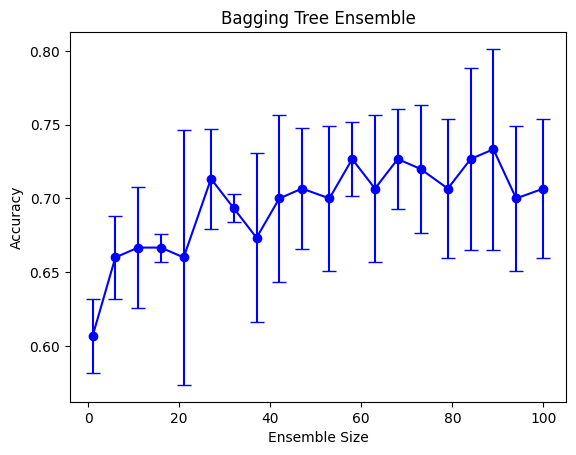

In [9]:
plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

#Visualizando a acuracia do modelo

#Boosting

In [10]:
from sklearn.ensemble import AdaBoostClassifier

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1) #instanciando o modelo de arvore de decisao

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)'] #Criando varios algoritmos, com parametros diferentes.

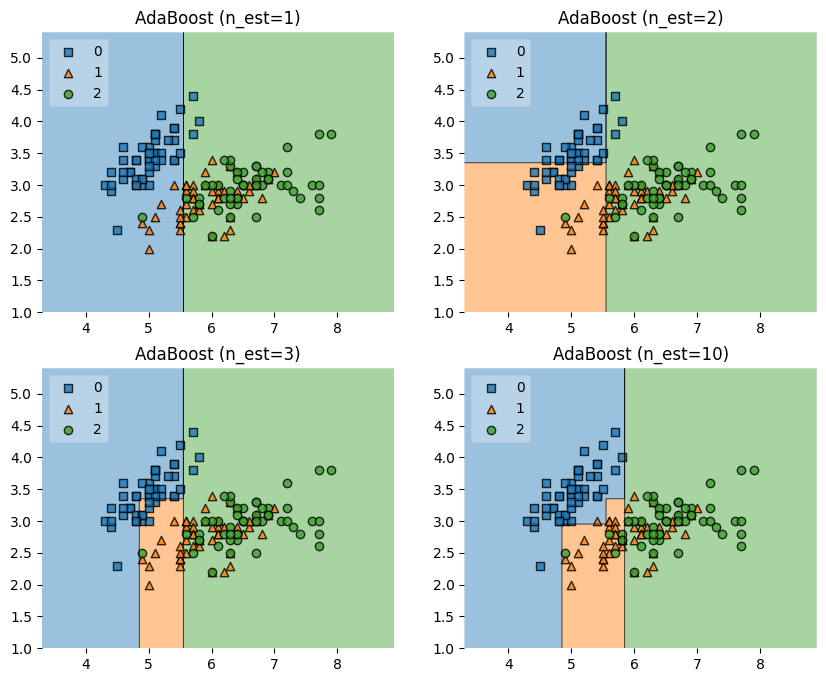

In [12]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(estimator=clf, n_estimators=n_est)   
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=boosting, legend=2)
    plt.title(label)

plt.show()

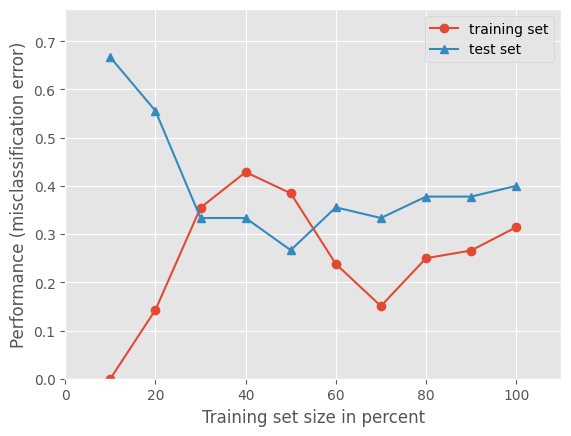

In [13]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(estimator=clf, n_estimators=10)
        
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

In [14]:
#Ensemble Size
num_est = list(map(int, np.linspace(1,100,20)))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

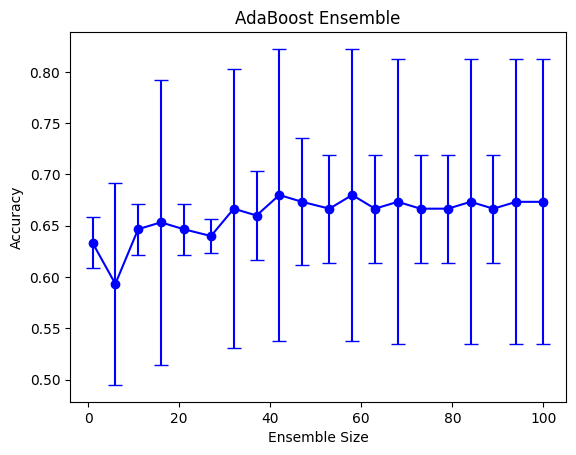

In [15]:
plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()

Alem do Adaboosting, que eh um dos mais famosos, o mais popular modelo para boosting, eh o famoso modelo XGBoost, que eh baseado em arvores de decisao e eh conhecido por sua alta perfomace. Muito usado em competicoes do Kaggle e em producao.

Link da documentacao: https://xgboost.readthedocs.io/en/stable/

#Stacking

Aqui, a ideia dos algoritmos de Stacking, seria empilhar varios modelos, de forma hierarquica para obter resultados maisa precisos.

In [16]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

In [17]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1) #Instanciando diversos modelos aqui, e colocando todos eles em um algoritmo de Stacking
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

Accuracy: 0.71 (+/- 0.03) [KNN]
Accuracy: 0.72 (+/- 0.03) [Random Forest]
Accuracy: 0.79 (+/- 0.04) [Naive Bayes]
Accuracy: 0.71 (+/- 0.03) [Stacking Classifier]


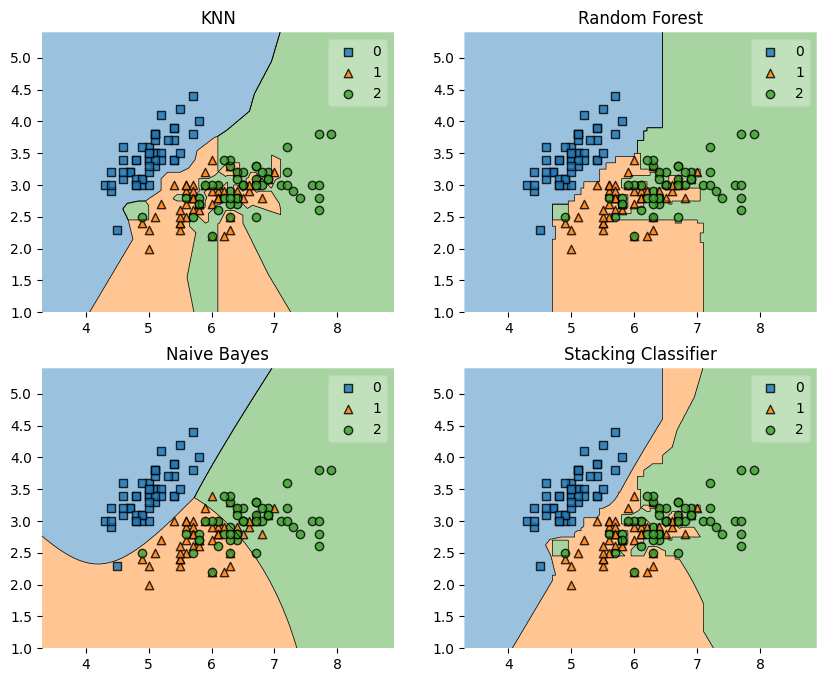

In [18]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()

#mais uma vez mostrando as fronteiras de decisao

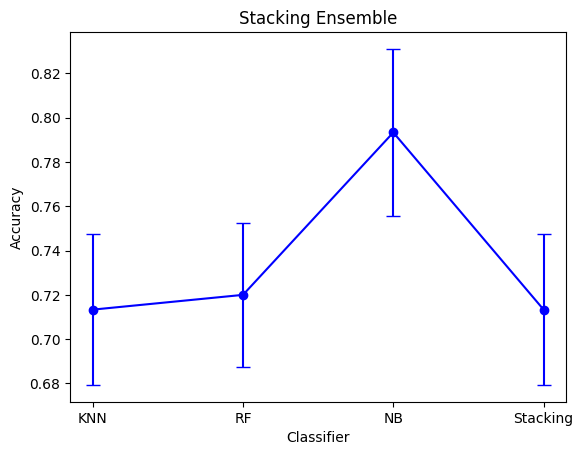

In [22]:
#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

#Aqui, podemos ver que o modelo que obteve a melhor acuracia, foi o Naive Bayes. Eh uma otima metrica, mas nao deve ser considerada como verdade absoluta.

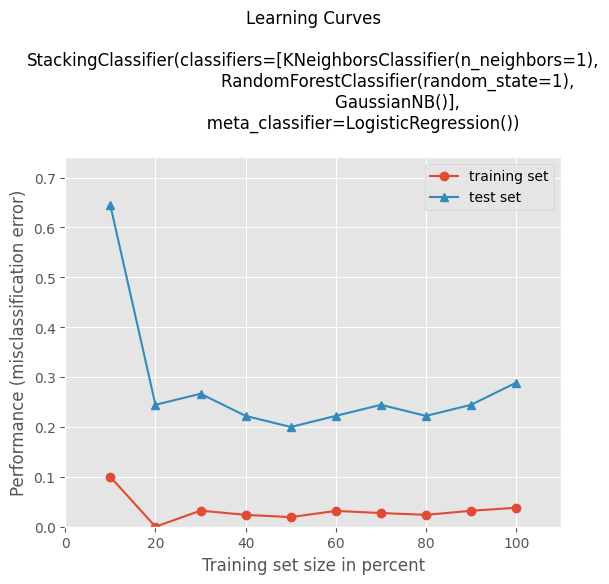

In [21]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=True, style='ggplot')
plt.show()